<a href="https://colab.research.google.com/github/mohammedmoin44/Bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data science Project/SeoulBikeData.csv',encoding='unicode_escape')


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [8]:
df['Date']= pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

In [10]:
df['Month']= pd.DatetimeIndex(df['Date']).month
df['Year']= pd.DatetimeIndex(df['Date']).year

In [11]:
df.head(20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
5,2017-01-12,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
6,2017-01-12,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
7,2017-01-12,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,1,2017
8,2017-01-12,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,1,2017
9,2017-01-12,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,1,2017


In [12]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
Month                                 int64
Year                                  int64
dtype: object

##EDA  (Exploratory data analysis)

---


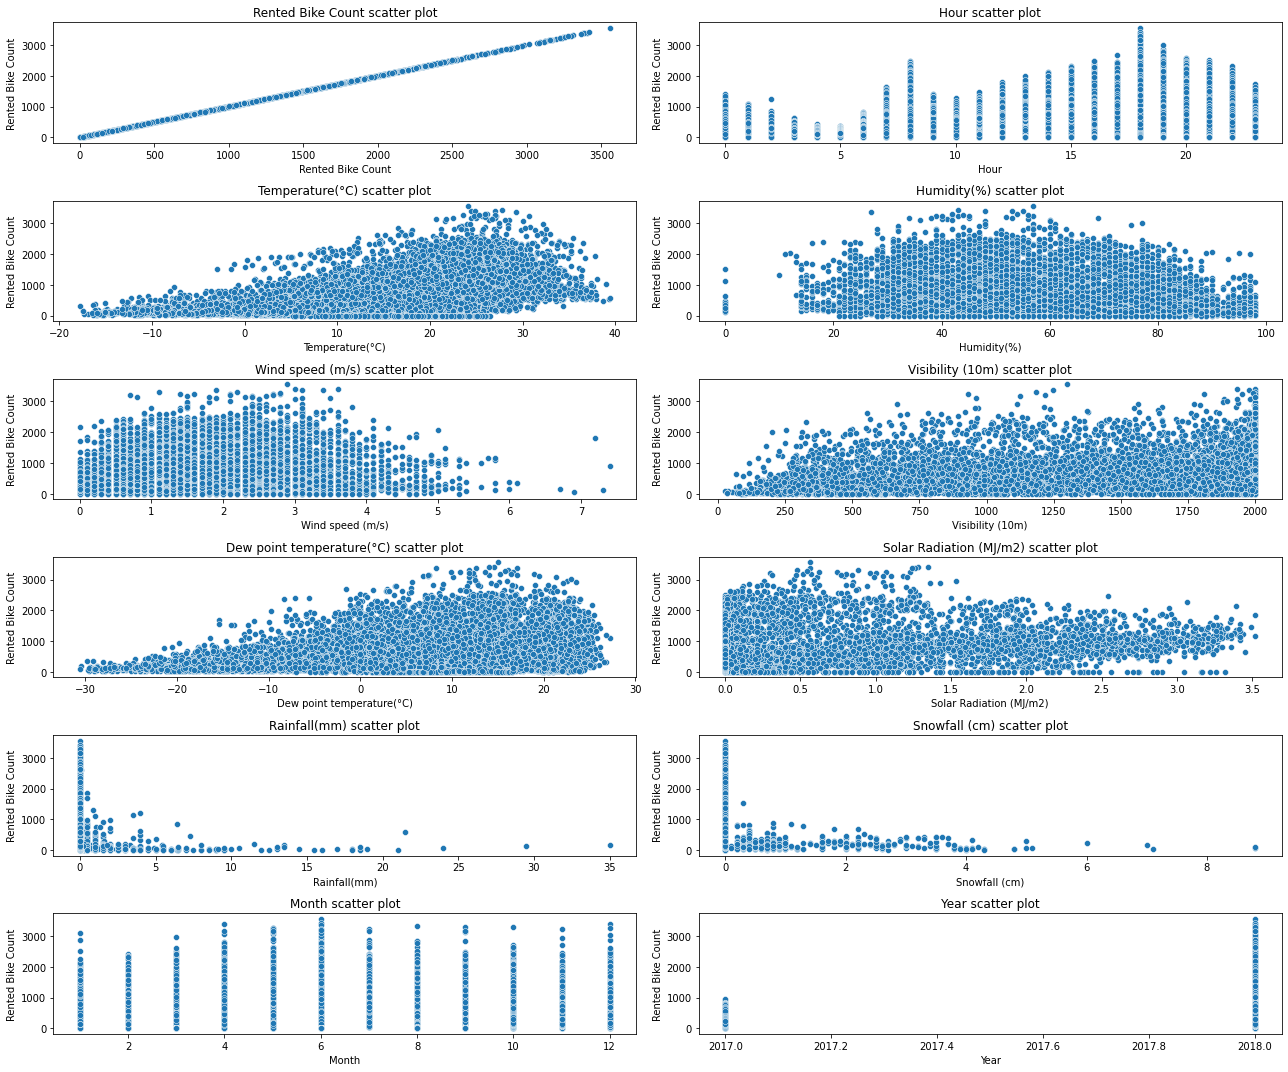

In [13]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(6,2, i+1)
    sns.scatterplot(data= df,x=col,y='Rented Bike Count')
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    plt.title(f'{col} ''scatter plot')
plt.tight_layout()



*   Demand for bike seems to increasing during office hours for work commute
*   As temperature increases the demand for rental bikes increases 


*   Snow and Rainfall have negative impact on rental bikes






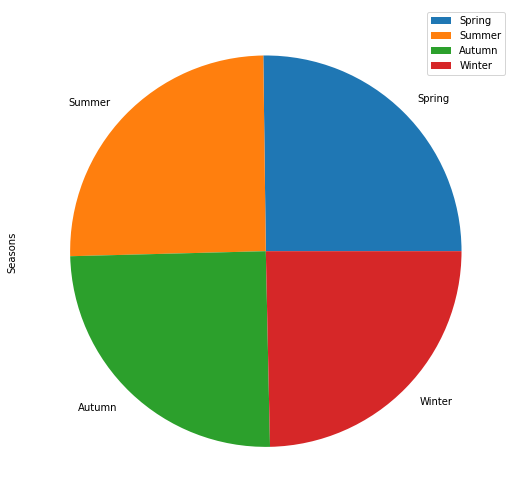

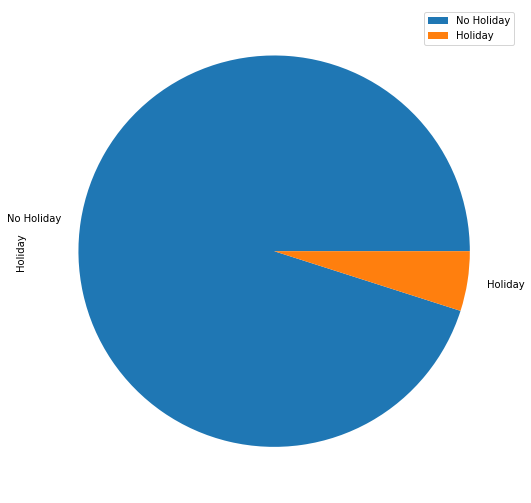

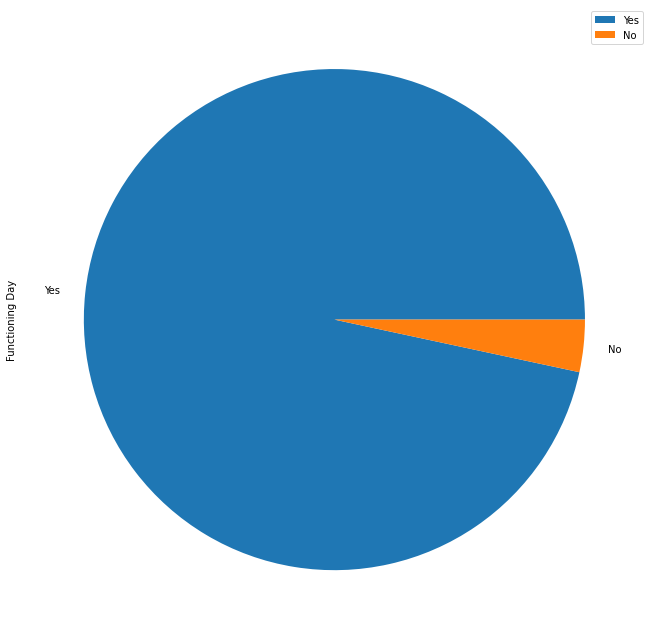

In [14]:
for i,col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplots(0,i)
    df[col].value_counts().plot(kind='pie',legend=True,figsize=(13,9))
plt.tight_layout()

Functioning day and Holiday seems to highly imbalanced whereas season seems to balanced

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


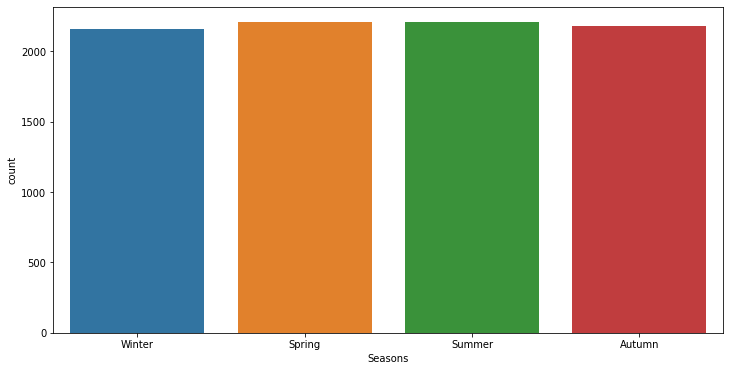

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(df['Seasons'])


Seasons are equally distributed

Text(0.5, 1.0, 'Rented Bike Count with respect to seasons')

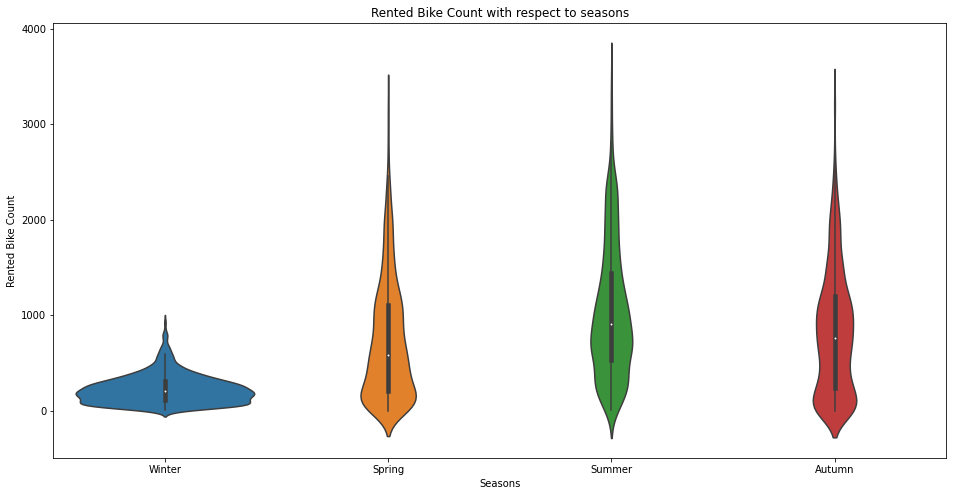

In [16]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=df, x="Seasons", y="Rented Bike Count")
plt.title('Rented Bike Count with respect to seasons')

As we can see from above figure winter has a least demand for rental bike's and wheres summer has the highest demand for rental bikes

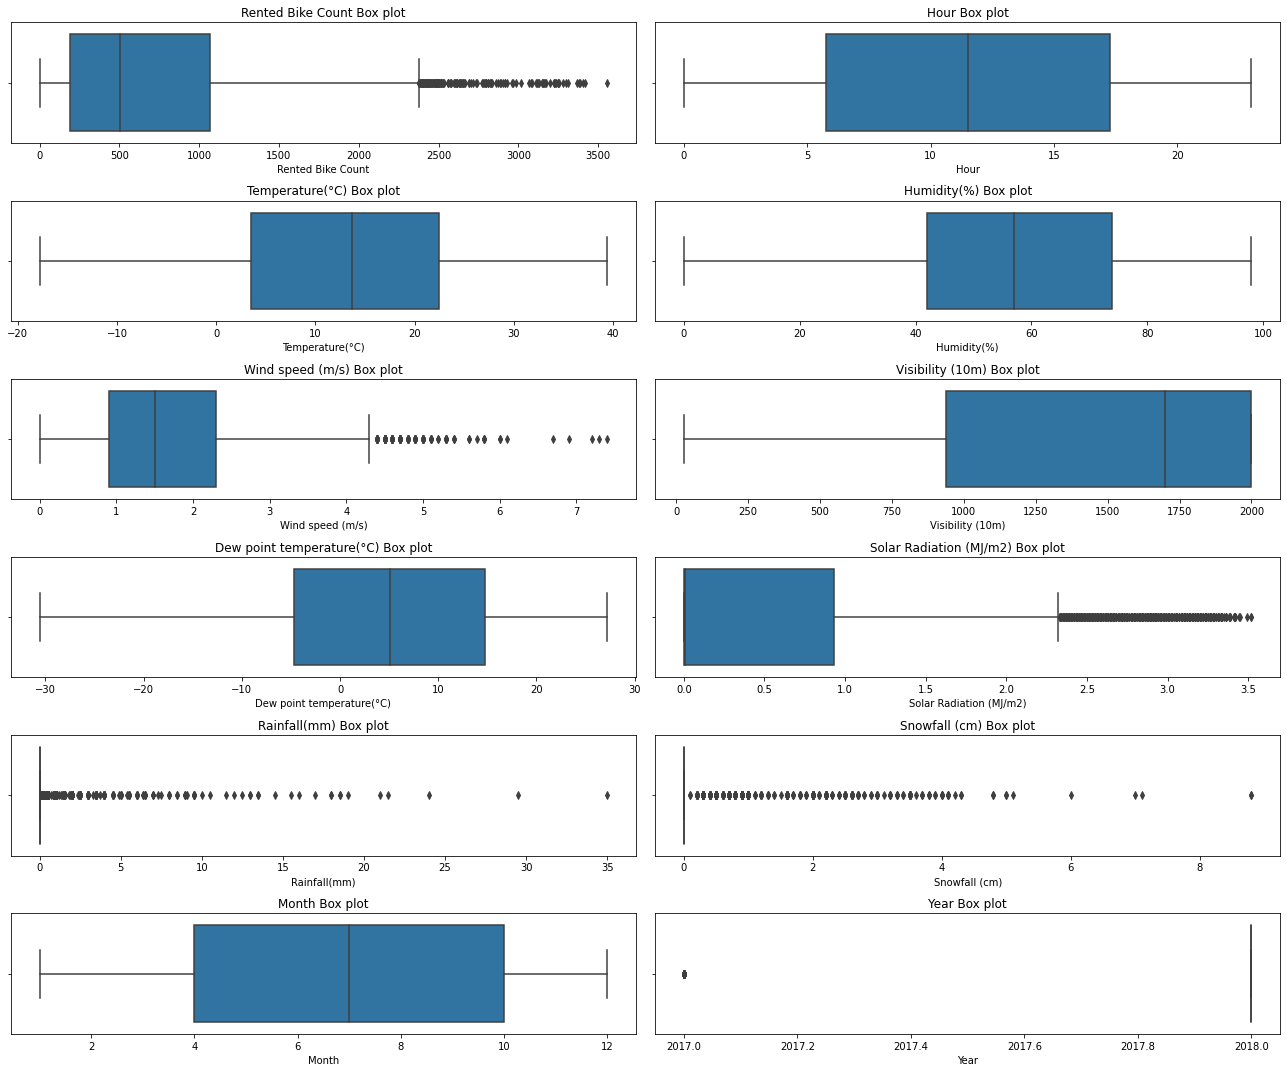

In [17]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(6,2, i+1)
    sns.boxplot(data= df,x=col)
    plt.xlabel(col)
    plt.title(f'{col} ''Box plot')
plt.tight_layout()

Ranin fall,snowfall, solar radiation, wind speed,Rented bike count have outliers

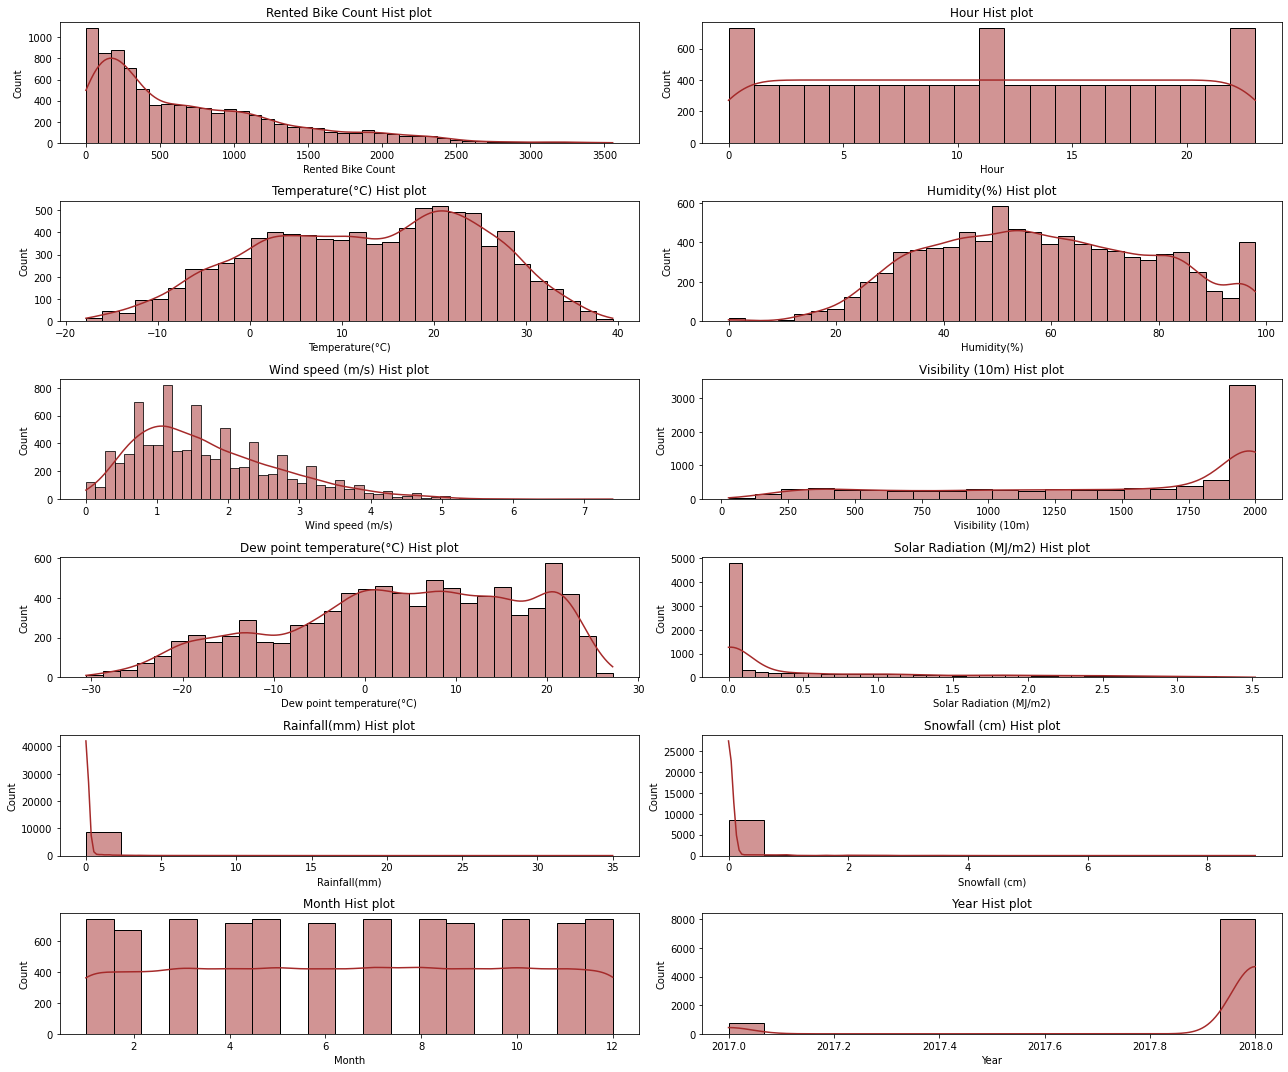

In [18]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(6,2, i+1)
    sns.histplot(data= df,x=col,kde=True,color='brown')
    plt.xlabel(col)
    plt.title(f'{col} ''Hist plot')
plt.tight_layout()

##Feature Engineering 


---







Assumptions for regression Model are:

Regression model should be linear in the coefficients (means change in target variable due to one unit change in independent variable should be constant).

No multicollinearity (no correlation b/w independent variables).

Linearity and independence of residuals or no autocorrelation (we can check linearity drawing the scatter plot between residuals (x-axis) and target variable values (y-axis) and independence means no correlation in error terms).

Residuals should follow Normal distribution with zero mean and equal variance (homoscedasticity).

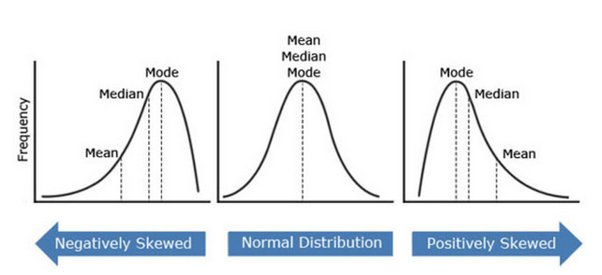

Power transforms are a technique for transforming numerical input or output variables to have a uniform or a Gaussian probability distribution. A power transform will make the probability distribution of a variable more Gaussian.

Currently, Power Transformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive and negative data.

i will be using Yeo-Johnson transform

but from above figure we say that some variables do not follow normal distribution that has to be corrected

In [19]:
df_1 = df.drop(columns=['Year','Month'])
df_1=list(df_1.select_dtypes(include=['int64','float64']).columns)

In [20]:
from sklearn.preprocessing import PowerTransformer
pt_yj=PowerTransformer(method = 'yeo-johnson')
df[df_1]=pt_yj.fit_transform(df[df_1])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,2017-01-12,-0.530004,-1.902967,-1.524521,-1.038829,0.618103,0.978214,-1.556854,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
1,2017-01-12,-0.676497,-1.654871,-1.550870,-0.986482,-0.923651,0.978214,-1.556854,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
2,2017-01-12,-0.779424,-1.440263,-1.594819,-0.934363,-0.640327,0.978214,-1.563069,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
3,2017-01-12,-1.047379,-1.244866,-1.612409,-0.882465,-0.778203,0.978214,-1.556854,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
4,2017-01-12,-1.200315,-1.062616,-1.594819,-1.091410,0.700184,0.978214,-1.618915,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,0.695553,1.050241,-0.715942,-1.197308,0.932074,0.762392,-1.096786,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018
8756,2018-11-30,0.403665,1.170220,-0.783248,-1.038829,0.700184,0.978214,-1.071138,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018
8757,2018-11-30,0.307082,1.288636,-0.850709,-0.934363,-1.801586,0.912535,-1.071138,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018
8758,2018-11-30,0.332501,1.405578,-0.892966,-0.830782,-0.640327,0.692237,-1.064717,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018


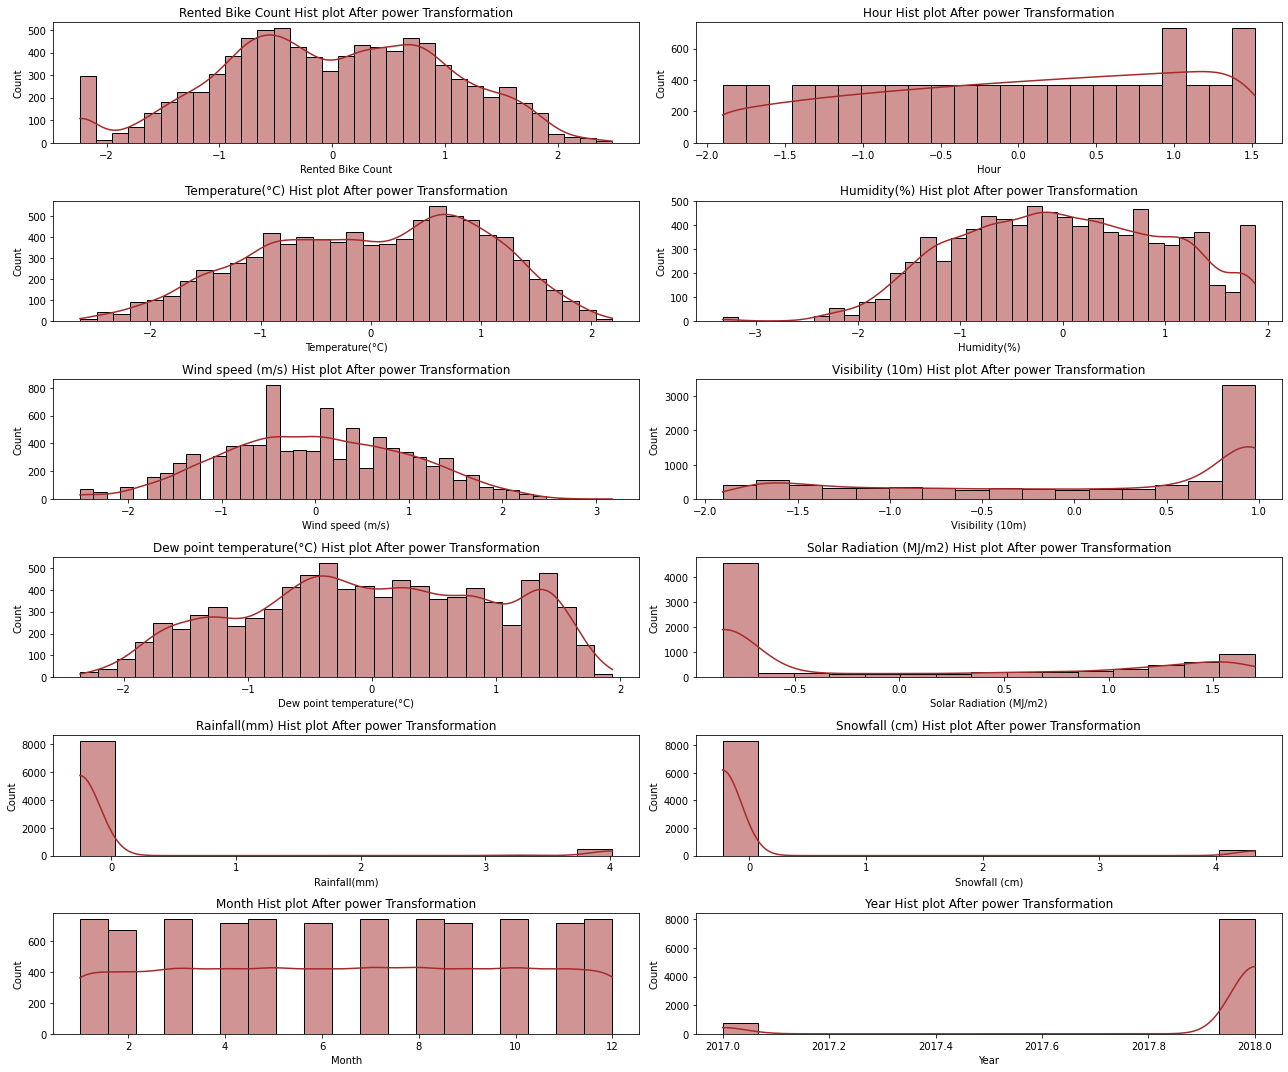

In [21]:
plt.figure(figsize=(18, 15))
for i,col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(6,2, i+1)
    sns.histplot(data= df,x=col,kde=True,color='brown')
    plt.xlabel(col)
    plt.title(f'{col} ''Hist plot After power Transformation')
plt.tight_layout()

The distribution seems to be better compare to previous distribution without transformation

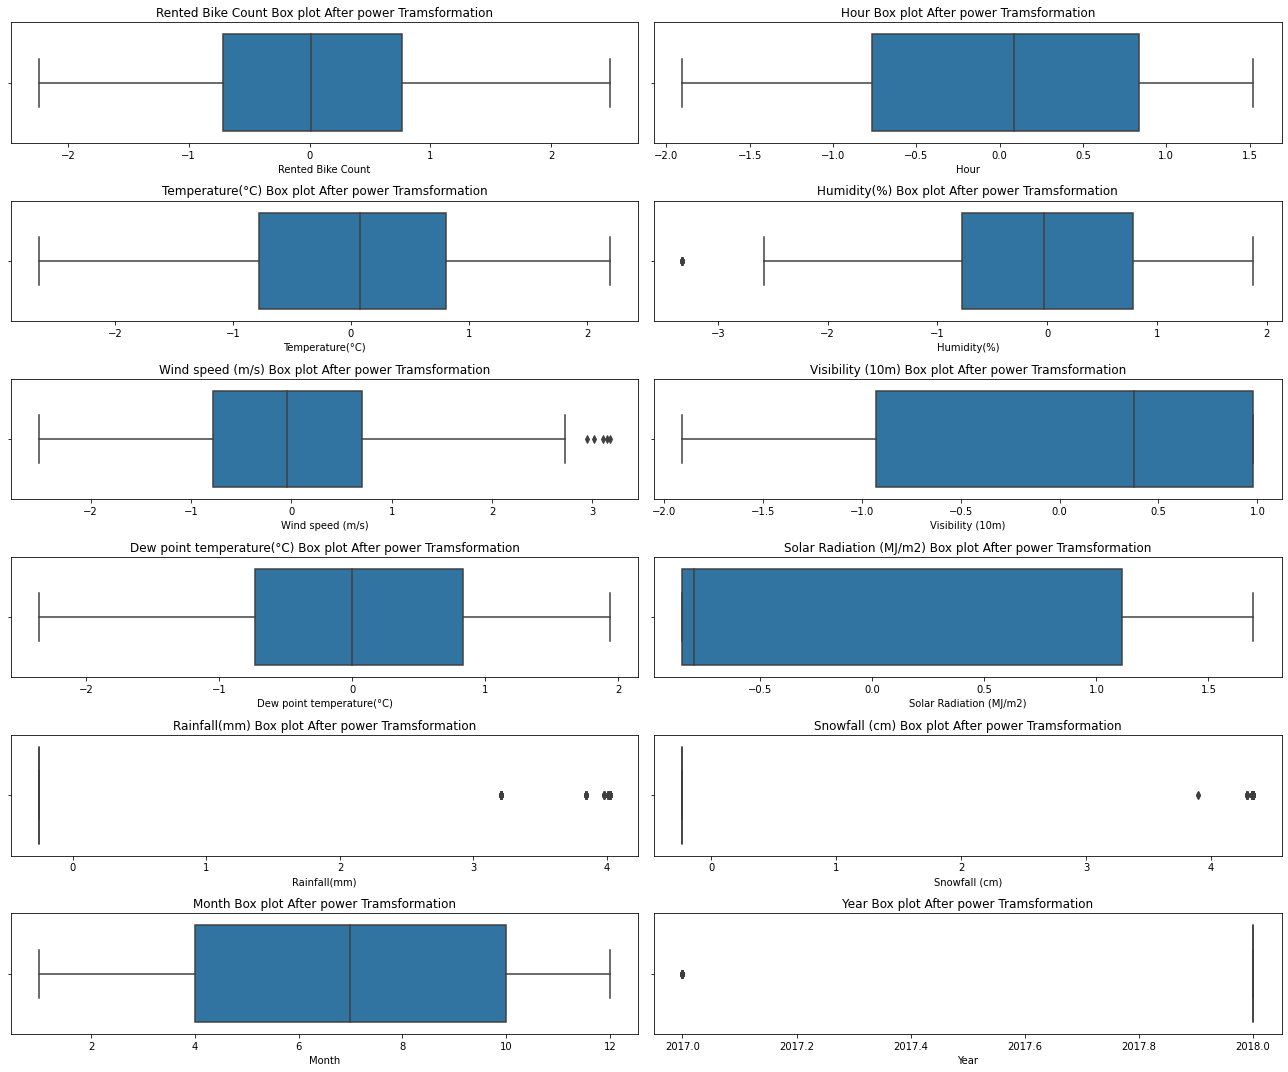

In [22]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(6,2, i+1)
    sns.boxplot(data= df,x=col)
    plt.xlabel(col)
    plt.title(f'{col} ''Box plot After power Tramsformation')
plt.tight_layout()

After transformation the data seems to have less outliers than before

##Detecting Multicolinearity

In [23]:
df_c = df.select_dtypes(include=['int64','float64'])
df_c =df_c.drop(columns=['Month','Year'])
corr=df_c.corr()

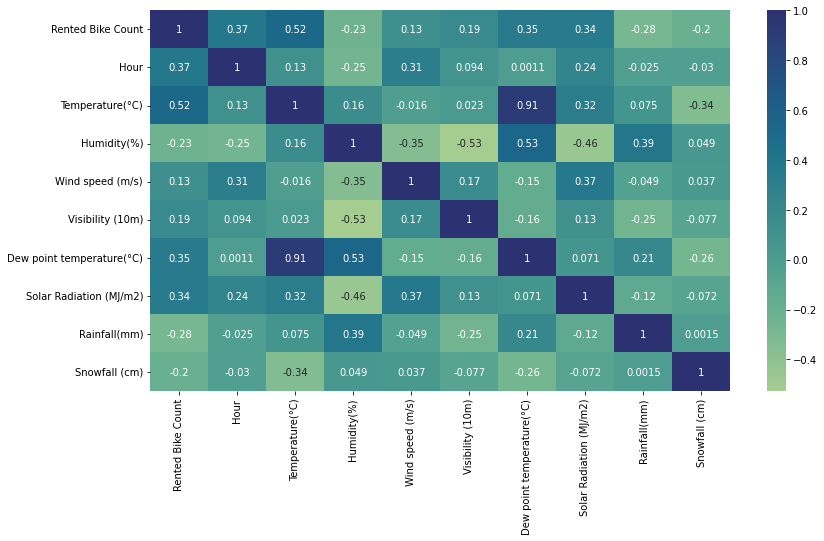

In [24]:
plt.figure(figsize=(13,7))
sns.heatmap(corr, cmap="crest",annot=True)
plt.show()

From above figure we can see that Dew point Temperature and Temperature are correlated one of variable should be dropped i will be dropping dew point temperature variable

In [25]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,2017-01-12,-0.530004,-1.902967,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
1,2017-01-12,-0.676497,-1.654871,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
2,2017-01-12,-0.779424,-1.440263,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
3,2017-01-12,-1.047379,-1.244866,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
4,2017-01-12,-1.200315,-1.062616,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,0.695553,1.050241,-0.715942,-1.197308,0.932074,0.762392,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018
8756,2018-11-30,0.403665,1.170220,-0.783248,-1.038829,0.700184,0.978214,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018
8757,2018-11-30,0.307082,1.288636,-0.850709,-0.934363,-1.801586,0.912535,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018
8758,2018-11-30,0.332501,1.405578,-0.892966,-0.830782,-0.640327,0.692237,-0.845761,-0.252859,-0.230785,Autumn,No Holiday,Yes,11,2018


Since season follow order we can use label Encoder instead of One Hot Encoder which will increase dimensionality of data we can also apply Label Encoder to Holiday and Functioning day since it contains only binary data can be converted to 0 and 1  

##Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder as le_En

In [27]:
Var = list(['Seasons','Holiday','Functioning Day'])

In [28]:
df.groupby('Seasons').count()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Year
Seasons,,,,,,,,,,,,,,
Autumn,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Spring,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [29]:
df[Var] = df[Var].apply(le_En().fit_transform)

In [30]:
df.groupby('Seasons').count()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Year
Seasons,,,,,,,,,,,,,,
0,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
1,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


Labels values for Seasons\
0:Autumn\
1:Spring\
2:Summer\
3:Winter\
Labels values for Holiday\
1: Yes\
0: No\
Labels value for Funtioning Day\
1: No Holiday\
0: Holiday


In [31]:
df.drop(columns=['Date','Year'],inplace=True)

In [32]:
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7f8bf0161040>)

Hour : 13.61%
Temperature(°C) : 31.60%
Humidity(%) : 4.60%
Wind speed (m/s) : 1.52%
Visibility (10m) : 3.17%
Solar Radiation (MJ/m2) : 11.16%
Rainfall(mm) : 7.38%
Snowfall (cm) : 3.46%
Seasons : 4.31%
Holiday : 0.69%
Functioning Day : 18.07%
Month : 0.44%


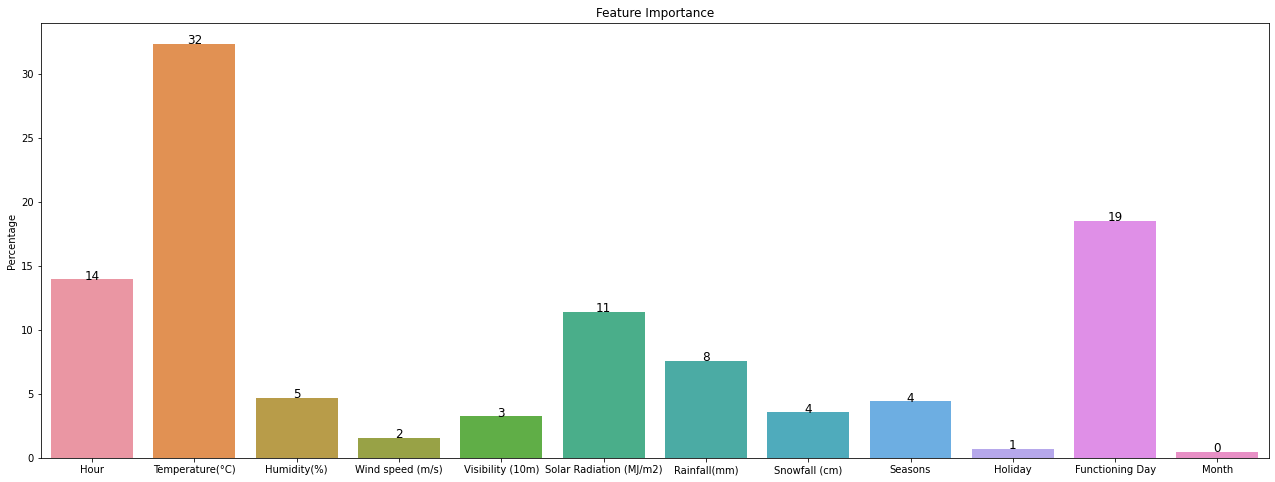

In [34]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
fig = plt.figure(figsize=(22,8))
sns.barplot(x=X.columns,y=fs.scores_/100,orient='v')
ax = fig.gca()
for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
plt.title('Feature Importance')
plt.ylabel('Percentage')
plt.show()

Since Month contributes only 0.44% it will be dropped


In [35]:
X = X.drop(columns=['Month'])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

##Feature Scaling 

i will be using Standard Scalar 

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 



In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Modeling

In [86]:
#importing regression models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor

#importing evaluation matrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

####RMSE

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

The formula is:

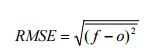

f = forecasts (expected values or unknown results)\
o = observed values (known results)

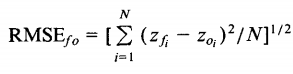

Where:

Σ = summation (“add up”)\
(zfi – Zoi)^2 = differences, squared\
N = sample size.

In [104]:
def predict(ml_model,X_train,y_train):
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    data = pd.DataFrame(y_pred,y_test)
    plt.scatter(y_pred,y_test,color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 = {r2_score(y_test,y_pred)}\n Adj R^2 = {1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE =: {mean_squared_error(y_test,y_pred,squared=False)}')
    accuracies = cross_val_score(estimator = ml_model, X = X_train, y = y_train, cv = 5)
    print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

R^2 = 0.7114263410465518
 Adj R^2 = 0.7099688983245647
 RMSE =: 0.5424227402809045
Cross Val Accuracy: 70.46 %


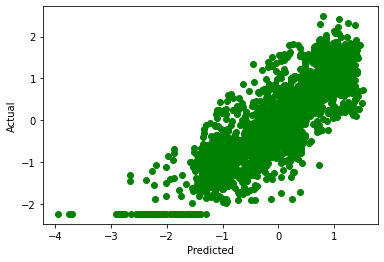

In [105]:
predict(LinearRegression(),X_train,y_train)

R^2 = 0.8030942300070856
 Adj R^2 = 0.8020997564212627
 RMSE =: 0.4480626742739917
Cross Val Accuracy: 80.86 %


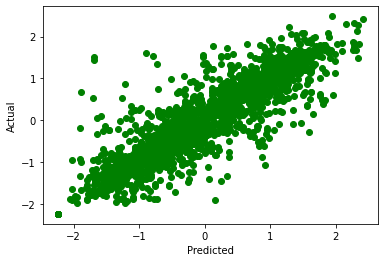

In [106]:
predict(DecisionTreeRegressor(),X_train,y_train)

R^2 = 0.9039246091196982
 Adj R^2 = 0.903439379872828
 RMSE =: 0.3129793075630638
Cross Val Accuracy: 89.57 %


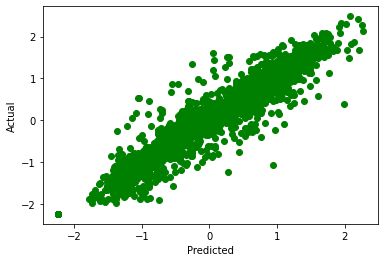

In [107]:
predict(RandomForestRegressor(),X_train,y_train)

R^2 = 0.892181155101915
 Adj R^2 = 0.8916366154812175
 RMSE =: 0.33155599328860014
Cross Val Accuracy: 88.74 %


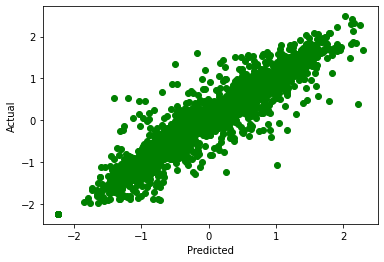

In [108]:
predict(BaggingRegressor(),X_train,y_train)

R^2 = 0.9066109305950333
 Adj R^2 = 0.9061392686283415
 RMSE =: 0.30857274878883745
Cross Val Accuracy: 90.21 %


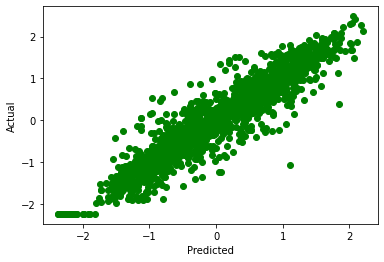

In [109]:
predict(LGBMRegressor(),X_train,y_train)

##Conclusion:


